# Importar Librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis breve de los distintos datasets

In [83]:
car_data = pd.read_csv('../datasets/car data.csv')
car_details = pd.read_csv('../datasets/CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3  = pd.read_csv('../datasets/Car details v3.csv')
car_details_v4  = pd.read_csv('../datasets/Car details v4.csv')

In [20]:
car_data.sample(5)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
car_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


In [21]:
car_details.sample(5)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [15]:
car_details.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,4340,1491,Maruti Swift Dzire VDI,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,4340.0,NaN,NaN,NaN,2013.090783,4.215344,1992.0,2011.0,2014.0,2016.0,2020.0
selling_price,4340.0,NaN,NaN,NaN,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,NaN,NaN,NaN,66215.777419,46644.102194,1.0,35000.0,60000.0,90000.0,806599.0
fuel,4340,5,Diesel,2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,4340,3,Individual,3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4340,2,Manual,3892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,4340,5,First Owner,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
car_details_v3.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3522,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
5646,Hyundai Santro Magna,2019,434999,19500,Petrol,Dealer,Manual,First Owner,20.3 kmpl,1086 CC,68.07 bhp,99.07Nm@ 4500rpm,5.0
1881,Maruti Ciaz S 1.3,2018,1000000,40000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
2104,Hyundai Elantra CRDi SX,2015,900000,145000,Diesel,Individual,Manual,First Owner,22.7 kmpl,1582 CC,126.2 bhp,259.88Nm@ 1900-2750rpm,5.0
3210,Tata Indica Vista Terra Quadrajet 1.3L,2010,105000,120000,Diesel,Individual,Manual,Second Owner,18.0 kmpl,1248 CC,75 bhp,190Nm@ 1750rpm,5.0


In [17]:
car_details_v3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8128,2058,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8128.0,NaN,NaN,NaN,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,NaN,NaN,NaN,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,NaN,NaN,NaN,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
fuel,8128,4,Diesel,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8128,3,Individual,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8128,2,Manual,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8128,5,First Owner,5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7907,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7907,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
len(car_details_v3['name'].unique())
len(car_details_v3['name'].unique())

2058

In [18]:
car_details_v4.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1502,Mercedes-Benz,GLC 220d 4MATIC Progressive [2019-2021],5200000,2019,10000,Diesel,Automatic,Delhi,Blue,First,Individual,1950 cc,192 bhp @ 3800 rpm,400 Nm @ 1600 rpm,AWD,4658.0,1890.0,1644.0,5.0,66.0
615,Maruti Suzuki,Celerio ZXi [2017-2019],445000,2018,71000,Petrol,Manual,Ludhiana,White,First,Individual,998 cc,67 bhp @ 6000 rpm,90 Nm @ 3500 rpm,FWD,3600.0,1600.0,1560.0,5.0,35.0
850,Mahindra,Scorpio LX BS-III,365000,2009,90000,Diesel,Manual,Lucknow,Green,Second,Individual,2179 cc,120 bhp @ 4000 rpm,290 Nm @ 1800 rpm,RWD,4430.0,1817.0,1975.0,8.0,60.0
1645,Maruti Suzuki,Wagon R LXI CNG (O),380000,2018,68320,CNG,Manual,Faridabad,Silver,First,Individual,998 cc,58 bhp @ 6200 rpm,77 Nm @ 3500 rpm,FWD,3599.0,1495.0,1700.0,5.0,35.0
1860,Toyota,Innova 2.8 ZX AT 7 STR [2016-2020],2150000,2017,45000,Diesel,Automatic,Mumbai,Grey,First,Individual,2755 cc,172 bhp @ 3400 rpm,360 Nm @ 1200 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [19]:
car_details_v4.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,2059,33,Maruti Suzuki,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2059,1050,X1 sDrive20d xLine,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,2059.0,NaN,NaN,NaN,1702991.696455,2419880.635434,49000.0,484999.0,825000.0,1925000.0,35000000.0
Year,2059.0,NaN,NaN,NaN,2016.425449,3.363564,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,NaN,NaN,NaN,54224.714424,57361.721314,0.0,29000.0,50000.0,72000.0,2000000.0
Fuel Type,2059,9,Diesel,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,2059,2,Manual,1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2059,77,Mumbai,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,2059,17,White,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,2059,6,First,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
car_details_v3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'mileage_as_number', 'max_power_as_number', 'engine_as_number',
       'torque_standardized'],
      dtype='object')

| **Car data**      | **CAR DETAILS FROM CAR DEKHO** | **Car details v3** | **Car details v4** |
|-------------------|--------------------------------|--------------------|--------------------|
| 301 observaciones | 4340 observaciones             | 8128 observaciones | 2059 observaciones |
| Car_Name          | name                           | name               | Make + Model       |
| Year              | year                           | year               | Year               |
| Selling_Price     | selling_Price                  | selling_price      | Price              |
| Present Price     | -                              | -                  | -                  |
| Kms_Driven        | km_driven                      | km_driven          | Kilometer          |
| Fuel_Type         | fuel                           | fuel               | Fuel Type          |
| Seller_Type       | seller_type                    | seller_type        | Seller Type        |
| Transmission      | transmission                   | transmission       | Transmission       |
| Owner             | owner                          | owner              | Owner              |
| -                 | -                              | mileage            | -                  |
| -                 | -                              | engine             | Engine             |
| -                 | -                              | max_power          | Max Power          |
| -                 | -                              | torque             | Max Torque         |
| -                 | -                              | seats              | Seating Capacity   |
| -                 | -                              | -                  | Drivetrain         |
| -                 | -                              | -                  | Length             |
| -                 | -                              | -                  | Width              |
| -                 | -                              | -                  | Height             |
| -                 | -                              | -                  | Location           |
| -                 | -                              | -                  | Color              |
| -                 | -                              | -                  | Fuel Tank Capacity |



Luego de revisar superficialmente los datasets, decidimos empezar a trabajar con `Car details v3`. El motivo es que cuenta con la mayor cantidad de observaciones (8128), y además suma 5 features con respecto a `car data` y `CAR DETAILS FROM CAR DEKHO`, que nos parece pueden resultar reelevantes en el entrenamiento de un modelo.

`Car details v4`, aunque con solo 2059 observaciones, cuenta con otras 7 features, algunas que pueden asumirse como interesantes para calcular el precio. Además, este dataset cuenta con valores de autos más actualizados que el dataset v3, por lo tanto podría suponerse que genere un mejor modelo para predecir el valor de autos de los últimos años. Eventualmente vamos a intentar explorar un poco las posibilidades con este dataset también, aunque manteniendo mayor foco en el dataset v3.

In [26]:
for column in car_details_v3.columns:
    unique_values = car_details_v3[column].unique()
    unique_count = len(unique_values)
    print(f"Feature: {column}")
    print(f"Number of unique values: {unique_count}")
    print(f"Unique values: {unique_values}\n")


Feature: name
Number of unique values: 2058
Unique values: ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']

Feature: year
Number of unique values: 29
Unique values: [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]

Feature: selling_price
Number of unique values: 677
Unique values: [  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  142500

In [27]:
car_details_v3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8128,2058,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8128.0,NaN,NaN,NaN,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,NaN,NaN,NaN,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,NaN,NaN,NaN,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
fuel,8128,4,Diesel,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8128,3,Individual,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8128,2,Manual,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8128,5,First Owner,5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7907,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7907,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(car_details_v3['fuel'].unique())
print(car_details_v3['seller_type'].unique())
print(car_details_v3['transmission'].unique())
print(car_details_v3['owner'].unique())
print(car_details_v3['year'].agg({ min: 'min', max: 'max'}))

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
<built-in function min>    1983
<built-in function max>    2020
Name: year, dtype: int64


### Tipos de datos:

- **Variables categóricas**: `name`, `fuel`, `seller_type`, `transmission`, `owner`, `engine`, `max_power`, `torque`, `seats`.
- **Variables de tipo fecha**: `year`.
- **Variables numéricas**: `km_driven`, `mileage`.
- **Target numérico**: `selling_price`

### Análisis de los datos:

- `name`, `engine`, `max_power` y `torque` tienen alta cardinalidad (2058, 121, 322 y 441 posibles valores, respectivamente).
- `fuel` tiene 4 valores posibles: `Diesel`, `Petrol`, `LPG` y `CNG`.
- `seller_type` tiene 3 valores posibles: `Individual`, `Dealer` y `Trustmark Dealer`.
- `transmission` puede ser `Manual` o `Automatic`.
- `owner` tiene 5 valores posibles: `First Owner`, `Second Owner`, `Third Owner`, `Fourth & Above Owner` y `Test Drive Car`
- Contamos con observaciones desde el año `1983` al `2020`.

Veamos distribución de las observaciones según algunas de las features:

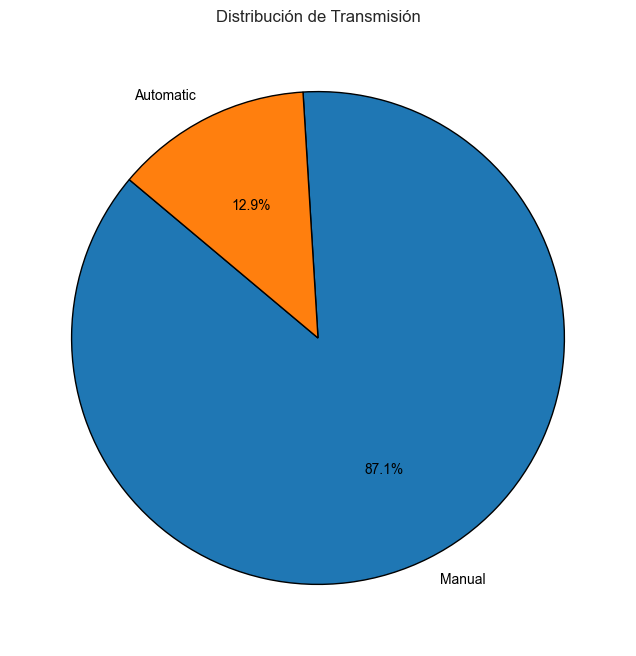

In [33]:
transmission_counts = car_details_v3['transmission'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    transmission_counts,
    labels=transmission_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución de Tipo de Transmisión')
plt.show()

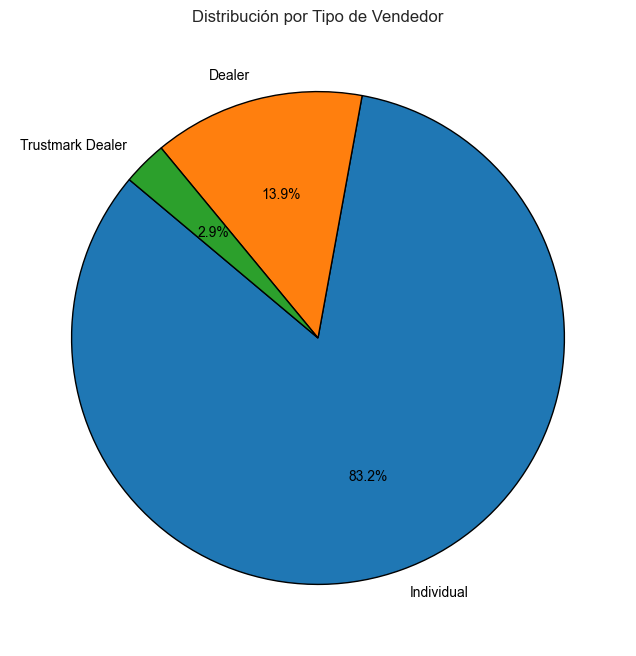

In [35]:
seller_type_counts = car_details_v3['seller_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    seller_type_counts,
    labels=seller_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución por Tipo de Vendedor')
plt.show()

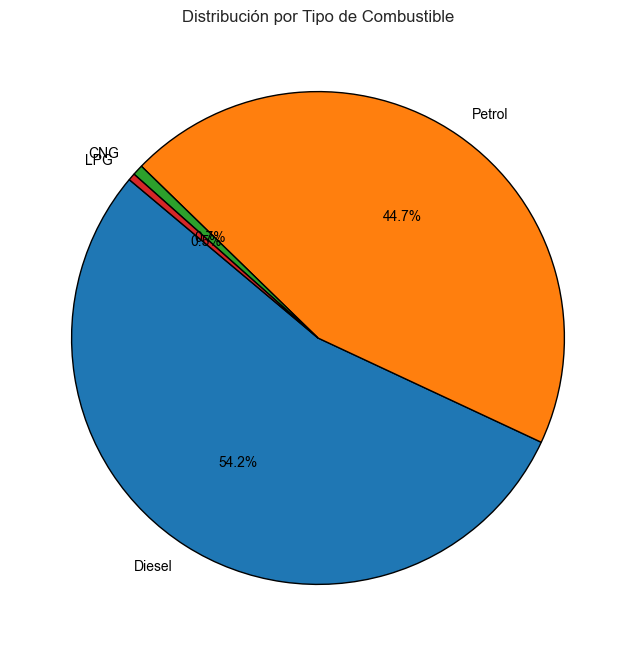

In [36]:
fuel_counts = car_details_v3['fuel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    fuel_counts,
    labels=fuel_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución por Tipo de Combustible')
plt.show()

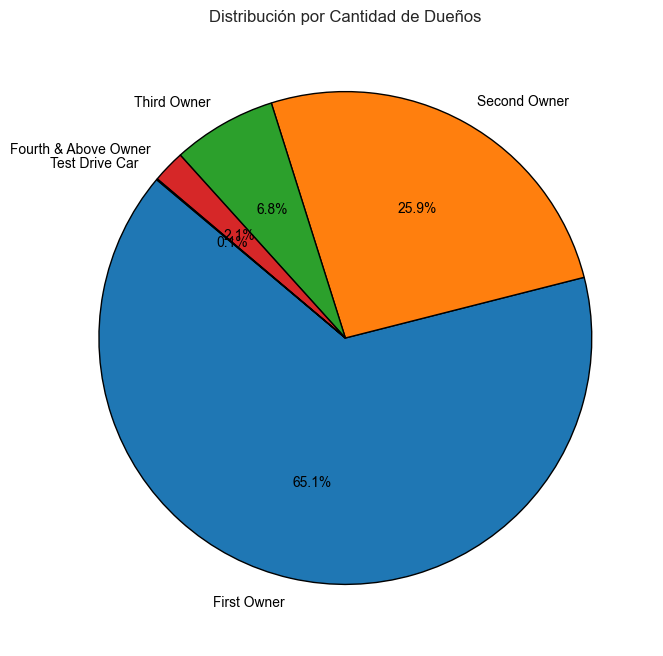

In [37]:
owner_counts = car_details_v3['owner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    owner_counts,
    labels=owner_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución por Cantidad de Dueños')
plt.show()

In [38]:
missing_values = car_details_v3.isnull().sum()

for column, missing in missing_values.items():
    print(f"Feature: {column} - Missing values: {missing}")

Feature: name - Missing values: 0
Feature: year - Missing values: 0
Feature: selling_price - Missing values: 0
Feature: km_driven - Missing values: 0
Feature: fuel - Missing values: 0
Feature: seller_type - Missing values: 0
Feature: transmission - Missing values: 0
Feature: owner - Missing values: 0
Feature: mileage - Missing values: 221
Feature: engine - Missing values: 221
Feature: max_power - Missing values: 215
Feature: torque - Missing values: 222
Feature: seats - Missing values: 221


Vemos que en las 5 features donde tenemos valores faltantes, los mismos responden a aproximadamente un 2,7% de las observaciones.

In [48]:
missing_all = car_details_v3[
    car_details_v3[['mileage', 'engine', 'max_power', 'torque', 'seats']].isnull().all(axis=1)
]

rows_missing_all_features = missing_all.shape[0]
print(f"Cantidad de filas con todas las características 'mileage', 'engine', 'max_power', 'torque' y 'seats' faltantes: {rows_missing_all_features}")

Cantidad de filas con todas las características 'mileage', 'engine', 'max_power', 'torque' y 'seats' faltantes: 215


In [49]:
missing_all = car_details_v3[
    car_details_v3[['mileage', 'engine', 'torque', 'seats']].isnull().all(axis=1)
]

rows_missing_all_features = missing_all.shape[0]
print(f"Cantidad de filas con todas las características 'mileage', 'engine', 'torque' y 'seats' faltantes: {rows_missing_all_features}")

Cantidad de filas con todas las características 'mileage', 'engine', 'torque' y 'seats' faltantes: 221


In [39]:
transmission_counts

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [40]:
seller_type_counts

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [41]:
owner_counts

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [42]:
fuel_counts

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

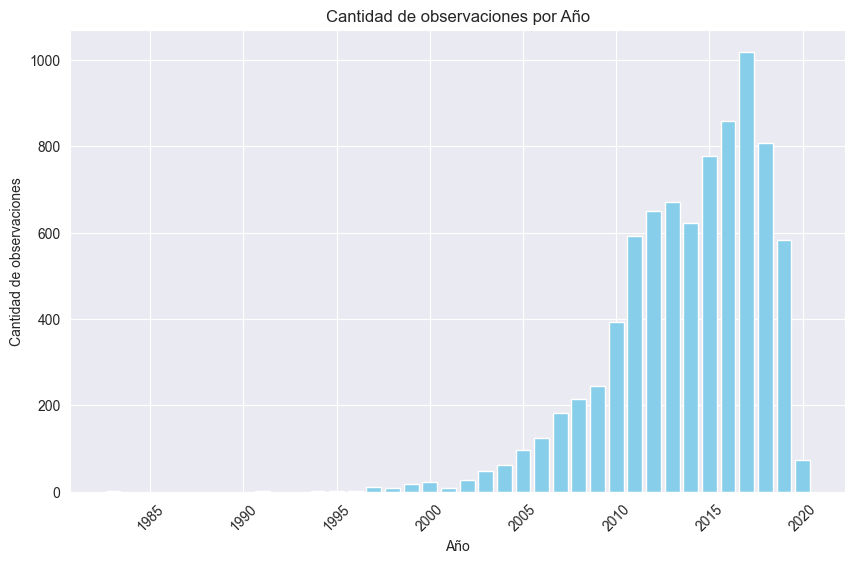

In [45]:
year_counts = car_details_v3['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de observaciones')
plt.title('Cantidad de observaciones por Año')
plt.xticks(rotation=45)
plt.show()

In [44]:
year_counts

year
1983       1
1991       1
1994       3
1995       2
1996       3
1997      11
1998      10
1999      18
2000      22
2001      10
2002      27
2003      49
2004      62
2005      97
2006     124
2007     183
2008     214
2009     246
2010     394
2011     592
2012     651
2013     670
2014     621
2015     776
2016     859
2017    1018
2018     807
2019     583
2020      74
Name: count, dtype: int64

Parece una distribución sesgada a izquierda.

Valor mínimo de km_driven: 1
Valor máximo de km_driven: 2360457


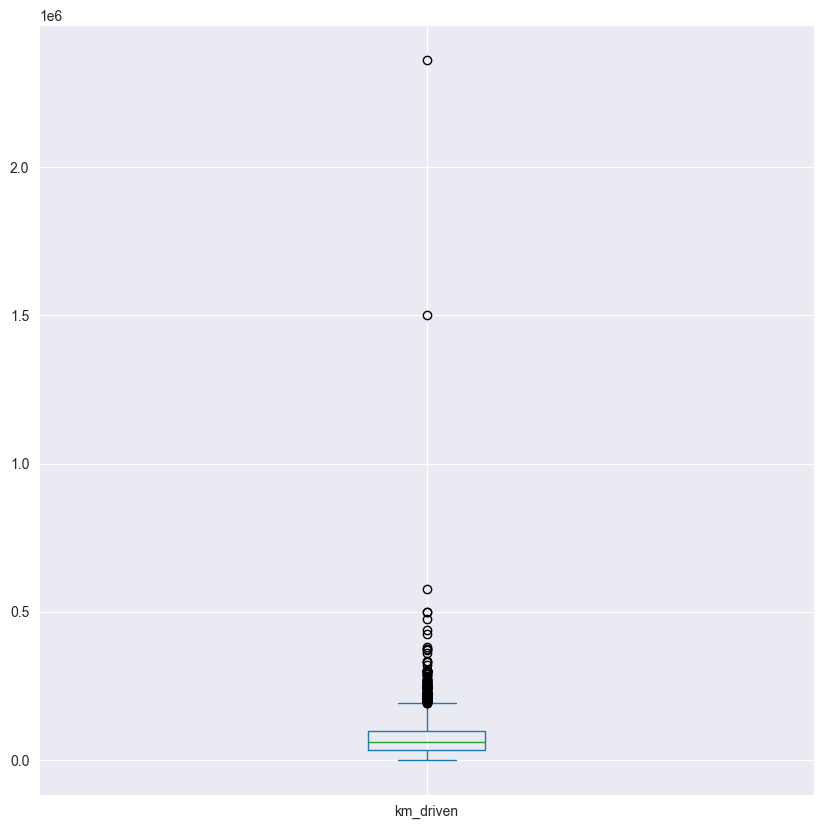

In [51]:
car_details_v3['km_driven'].plot(
    kind='box',
    figsize=(10, 10)
)

min_km_driven = car_details_v3['km_driven'].min()
max_km_driven = car_details_v3['km_driven'].max()

print(f"Valor mínimo de km_driven: {min_km_driven}")
print(f"Valor máximo de km_driven: {max_km_driven}")

Todos los valores parecen lógicos. Veamos los que tienen menos de 10000 km

In [53]:
car_details_v3[car_details_v3['km_driven'] < 10000].sort_values(by='km_driven', ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.1 km/kg,1196 CC,73 bhp,101Nm@ 3000rpm,5.0
7589,Maruti Swift LXI,2020,445000,1000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
2963,Maruti Swift AMT VXI,2020,654000,1000,Petrol,Individual,Automatic,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
7492,Hyundai Santro Magna,2020,500000,1000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1086 CC,68.07 bhp,99.07Nm@ 4500rpm,5.0
399,Honda City i-VTEC CVT V,2018,1085000,1000,Petrol,Individual,Automatic,First Owner,18.0 kmpl,1497 CC,117.6 bhp,145Nm@ 4600rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,Renault KWID RXT Optional,2016,356000,9656,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
5311,Hyundai i10 Magna 1.1L,2016,420000,9750,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
72,Maruti Vitara Brezza ZDi Plus AMT,2019,1025000,9850,Diesel,Individual,Automatic,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
3279,Maruti Gypsy King Soft Top MPI BSIV,2019,750000,9900,Petrol,Individual,Manual,First Owner,11.96 kmpl,1298 CC,80 bhp,103Nm@ 4500rpm,8.0


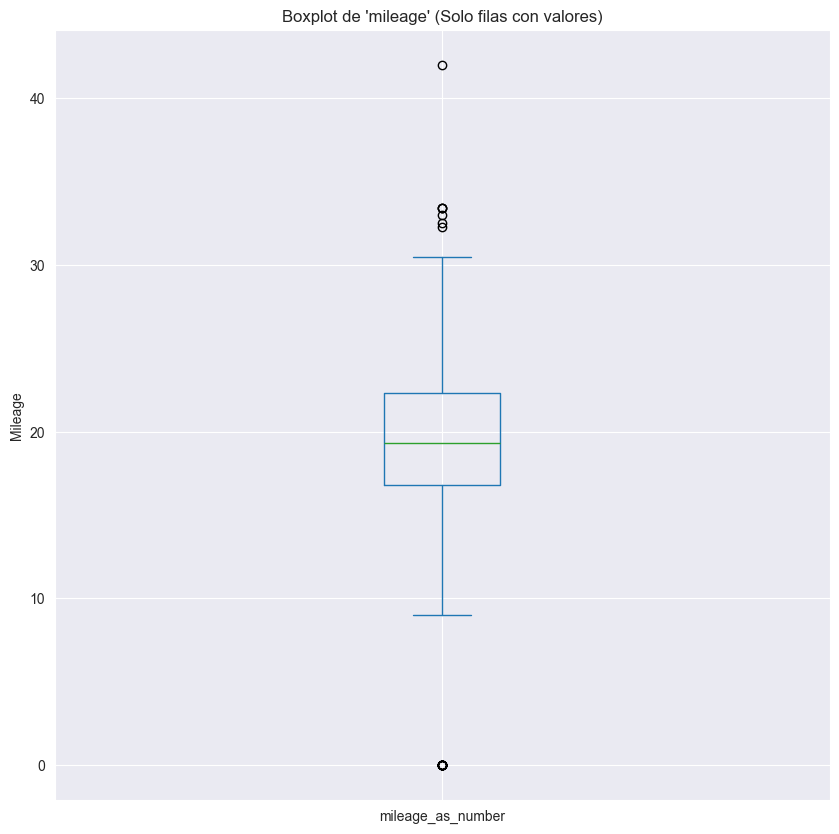

In [60]:
mileage_non_null = car_details_v3[car_details_v3['mileage'].notnull()].copy()

# Limpiar y convertir 'mileage' a numérico
mileage_non_null['mileage_as_number'] = mileage_non_null['mileage'].str.replace(r'[^0-9.]+', '', regex=True)
mileage_non_null['mileage_as_number'] = pd.to_numeric(mileage_non_null['mileage_as_number'], errors='coerce')

# Crear el boxplot para 'mileage_as_number'
mileage_non_null['mileage_as_number'].plot(
    kind='box',
    figsize=(10, 10)
)
plt.title("Boxplot de 'mileage' (Solo filas con valores)")
plt.ylabel('Mileage')
plt.show()


In [63]:
mileage_non_null[mileage_non_null['mileage_as_number'] < 10].sort_values(by='mileage_as_number', ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number
2366,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,0.0
5846,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0 kmpl,1197 CC,103.25 bhp,175nm@ 1500-4100rpm,5.0,0.0
5843,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0 kmpl,1197 CC,103.25 bhp,175nm@ 1500-4100rpm,5.0,0.0
5276,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62 bhp,96.1Nm@ 3000rpm,5.0,0.0
6629,Mahindra Bolero Pik-Up CBC 1.7T,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,200Nm@ 1400-2200rpm,2.0,0.0
4527,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0 kmpl,2987 CC,165 bhp,510@ 1600-2400,5.0,0.0
7337,Mercedes-Benz GLC 220d 4MATIC,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,0.0 kmpl,1950 CC,194 bhp,400nm@ 2800rpm,5.0,0.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,0.0
5900,Mahindra Bolero Pik-Up FB 1.7T,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.0 kmpl,2523 CC,70 bhp,200Nm@ 1400-2200rpm,2.0,0.0
6534,Hyundai Santro Xing GL,2010,150000,110000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62 bhp,96.1Nm@ 3000rpm,5.0,0.0


In [64]:
car_details_v3[car_details_v3['seats'] < 2].sort_values(by='seats', ascending=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [68]:
car_details_v3.sample(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3980,Hyundai EON Era Plus,2013,190000,70000,Petrol,Individual,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
6239,Hyundai Verna 1.6 CRDi S,2016,800000,80000,Diesel,Individual,Manual,First Owner,23.9 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
5170,Toyota Innova 2.5 G (Diesel) 8 Seater,2014,720000,80000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,8.0
4065,Mahindra Scorpio 2009-2014 SLE 7S BSIV,2014,550000,126000,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
778,Ford Endeavour Hurricane Limited Edition,2013,1075000,110000,Diesel,Individual,Automatic,Third Owner,12.8 kmpl,2953 CC,156 bhp,380Nm(38.7kgm)@ 2500rpm,7.0
6628,Maruti 800 AC,2007,45000,73257,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1766,Hyundai Xcent 1.2 VTVT S,2019,590000,90000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
2192,Maruti Alto 800 VXI,2016,300000,50000,Petrol,Individual,Manual,Second Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0
318,Toyota Innova 2.5 GX (Diesel) 8 Seater,2013,800000,160000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,8.0


In [105]:
def impute_nulls_with_similar(df):
    similar_found = 0
    non_similar_found = 0
    # Asegurarse de que 'name' y 'year' no tengan valores nulos
    df['name'] = df['name'].fillna('Unknown')
    df['year'] = df['year'].fillna(df['year'].mode()[0])
    
    # Crear un filtro para encontrar filas con valores nulos en las columnas a imputar
    null_condition = df[['mileage', 'engine', 'max_power', 'torque', 'seats']].isnull().any(axis=1)
    
    # Iterar sobre las filas que cumplen con la condición
    for idx, row in df[null_condition].iterrows():
        # Buscar vehículos similares (mismo nombre y año)
        similar_vehicles = df[(df['name'] == row['name']) & 
                              (df['year'] == row['year']) & 
                              (df[['mileage', 'engine', 'max_power', 'torque', 'seats']].notnull().any(axis=1))]
        
        if not similar_vehicles.empty:
            # Si se encuentran vehículos similares, usar el valor más cercano
            for column in ['mileage', 'engine', 'max_power', 'torque', 'seats']:
                if pd.isnull(row[column]):
                    a = 1
                    # df.at[idx, column] = similar_vehicles[column].iloc[0]
            similar_found = similar_found + 1
        else:
            # Si no se encuentran vehículos similares, usar la moda de la columna
            print(f"Imputing for {row['year']}-{row['name']} without similarities")
            for column in ['mileage', 'engine', 'max_power', 'torque', 'seats']:
                if pd.isnull(row[column]):
                    a = 1
                    # df.at[idx, column] = df[column].mode()[0]
            non_similar_found = non_similar_found + 1

                    
    print(f"Imputing {similar_found} vehicles with similarities")
    print(f"Imputing {non_similar_found} vehicles with non similarities")
    return df

def impute_invalid_with_similar(df):
    similar_found = 0
    non_similar_found = 0
    # Asegurarse de que 'name' y 'year' no tengan valores nulos
    df['name'] = df['name'].fillna('Unknown')
    df['year'] = df['year'].fillna(df['year'].mode()[0])
    
    # Iterar sobre las filas con valores nulos en la columna actual
    for idx, row in df[(df['mileage'] == '0.0 kmpl') | (df['max_power'].isin(['bhp', 0]))].iterrows():
        # Buscar vehículos similares (mismo nombre y año)
        similar_vehicles = df[(df['name'] == row['name']) & 
                              (df['year'] == row['year']) & 
                              (df[column].notnull())]

        print(f"Imputing for {row['year']}-{row['name']} without similarities")
        if not similar_vehicles.empty:
            # Si se encuentran vehículos similares, usar el valor más cercano
            # df.at[idx, column] = similar_vehicles[column].iloc[0]
            similar_found = similar_found + 1
        else:
            # Si no se encuentran vehículos similares, usar la moda de la columna
            # df.at[idx, column] = df[column].mode()[0]
            non_similar_found = non_similar_found + 1
    
    print(f"Imputing {similar_found} vehicles with similarities")
    print(f"Imputing {non_similar_found} vehicles with non similarities")
    return df

In [106]:
car_details_v3  = pd.read_csv('../datasets/Car details v3.csv')

In [98]:
car_details_v3[car_details_v3['name'] == 'Maruti Swift 1.3 ZXI']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5447,Maruti Swift 1.3 ZXI,2008,200000,90000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
5901,Maruti Swift 1.3 ZXI,2011,320000,85000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7581,Maruti Swift 1.3 ZXI,2006,229999,110000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN


In [107]:
car_details_v3 = impute_nulls_with_similar(car_details_v3)

Imputing for 2007-Maruti Swift 1.3 VXi without similarities
Imputing for 2003-Fiat Palio 1.2 ELX without similarities
Imputing for 2003-Tata Indica DLS without similarities
Imputing for 2015-Maruti Swift VDI BSIV W ABS without similarities
Imputing for 2010-Maruti Swift VDI BSIV without similarities
Imputing for 2017-BMW X1 sDrive 20D xLine without similarities
Imputing for 2012-Toyota Etios GD without similarities
Imputing for 2003-Maruti Omni E 8 Str STD without similarities
Imputing for 2008-Maruti Swift 1.3 VXi without similarities
Imputing for 2005-Tata Indica DLS without similarities
Imputing for 2010-Maruti Swift 1.3 VXi without similarities
Imputing for 1983-Mahindra Willys CJ 3B 4X4 without similarities
Imputing for 2005-Hyundai Santro Xing XL without similarities
Imputing for 2012-Toyota Etios Liva Diesel TRD Sportivo without similarities
Imputing for 2010-Maruti Swift VDI BSIV without similarities
Imputing for 2010-Maruti Estilo LXI without similarities
Imputing for 2008-Mar

In [ ]:
car_details_v3

In [181]:
def impute_invalid_with_similar(df):
    similar_found = 0
    non_similar_found = 0
    # Asegurarse de que 'name' y 'year' no tengan valores nulos
    df['name'] = df['name'].fillna('Unknown')
    df['year'] = df['year'].fillna(df['year'].mode()[0])
    
    # Iterar sobre las filas con valores nulos en la columna actual
    for idx, row in df[(df['mileage'] == '0.0 kmpl') | (df['max_power'].isin(['bhp', 0]))].iterrows():
        # Buscar vehículos similares (mismo nombre y año)
        similar_vehicles = df[(df['name'] == row['name']) & 
                              (df['year'] == row['year']) & 
                              (df[column].notnull())]
        
        if not similar_vehicles.empty:
            # Si se encuentran vehículos similares, usar el valor más cercano
            df.at[idx, column] = similar_vehicles[column].iloc[0]
            similar_found = similar_found + 1
        else:
            non_similar_found = non_similar_found + 1
            # Si no se encuentran vehículos similares, usar la moda de la columna
            # df.at[idx, column] = df[column].mode()[0]

    print(f"Imputing {similar_found} vehicles with similarities")
    print(f"Imputing {non_similar_found} vehicles with non similarities")
    return df

In [184]:
car_details_v3 = pd.read_csv('../datasets/Car details v3.csv')

In [185]:
car_details_v3 = impute_invalid_with_similar(car_details_v3)

KeyError: 'torque_standardized'

In [178]:
mileage_non_null = car_details_v3[car_details_v3['mileage'].notnull()].copy()

# Limpiar y convertir 'mileage' a numérico
car_details_v3['mileage_as_number'] = mileage_non_null['mileage'].str.replace(r'[^0-9.]+', '', regex=True)
car_details_v3['mileage_as_number'] = pd.to_numeric(car_details_v3['mileage_as_number'], errors='coerce')

# Limpiar y convertir 'engine' a numérico
car_details_v3['engine_as_number'] = mileage_non_null['engine'].str.replace(r'[^0-9.]+', '', regex=True)
car_details_v3['engine_as_number'] = pd.to_numeric(car_details_v3['engine_as_number'], errors='coerce')

# Limpiar y convertir 'max_power' a numérico
car_details_v3['max_power_as_number'] = mileage_non_null['max_power'].str.replace(r'[^0-9.]+', '', regex=True)
car_details_v3['max_power_as_number'] = pd.to_numeric(car_details_v3['max_power_as_number'], errors='coerce')

car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number,engine_as_number,max_power_as_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,18.50,1197.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16.80,1493.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,19.30,1248.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,23.57,1396.0,70.00


In [169]:
import re

def standardize_torque(torque_str):
    if pd.isna(torque_str):
        return np.nan

    # Match the torque value, unit, and RPM value
    torque_match = re.findall(r"(\d*\.?\d+)\s*(kgm|Nm|nm)?\s*@\s*([-\d\s,]*)\s*(rpm)?", torque_str)

    # If a match is found, process the first match
    if torque_match:
        value, unit, rpm_range, _ = torque_match[0]
        value = float(value)

        # Check for kgm and convert to Nm
        if 'kgm' in torque_str:
            value = value * 9.81  # Convert kgm to Nm

        # Format torque value to 2 decimal places
        torque_value = f"{value:.2f}Nm"

        # Clean and format the rpm_range
        rpm_value = rpm_range.strip().replace(',', '')  # Remove commas and whitespace

        # Combine torque and RPM value
        if rpm_value:
            return f"{torque_value} {rpm_value}rpm"
        else:
            return torque_value  # Return only the torque value if no RPM is found

    # Alternative regex to check for kgm in parentheses
    torque_match_alt = re.findall(r"(\d*\.?\d+)\s*@\s*([-\d\s,]*)\s*\(kgm@\s*rpm\)", torque_str)

    if torque_match_alt:
        value, rpm_range = torque_match_alt[0]
        value = float(value) * 9.81  # Convert kgm to Nm

        # Format torque value to 2 decimal places
        torque_value = f"{value:.2f}Nm"
        rpm_value = rpm_range.strip().replace(',', '')  # Remove commas and whitespace

        return f"{torque_value} {rpm_value}rpm"

    # Check for alternative formats (e.g., kgm without @)
    torque_match_kgm = re.findall(r"(\d*\.?\d+)\s*kgm\s*at\s*([-\d\s,]*)\s*(rpm)?", torque_str)

    if torque_match_kgm:
        value, rpm_range, _ = torque_match_kgm[0]
        value = float(value) * 9.81  # Convert kgm to Nm

        # Format torque value to 2 decimal places
        torque_value = f"{value:.2f}Nm"
        rpm_value = rpm_range.strip().replace(',', '')  # Remove commas and whitespace

        # Combine torque and RPM value
        if rpm_value:
            return f"{torque_value} {rpm_value}rpm"
        else:
            return torque_value  # Return only the torque value if no RPM is found

    # If no valid torque value is found, return NaN
    return np.nan


In [170]:
car_details_v3['torque_standardized'] = car_details_v3['torque'].apply(standardize_torque)
car_details_v3['torque_standardized'] = car_details_v3['torque_standardized'].round(2)

car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number,engine_as_number,max_power_as_number,torque_standardized
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,190.00Nm 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,250.00Nm 1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,124.59Nm 2700rpm
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,219.74Nm 1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,112.82Nm 4500rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,18.50,1197.0,82.85,113.70Nm 4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16.80,1493.0,110.00,235.44Nm 1900-2750rpm
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,19.30,1248.0,73.90,190.00Nm 2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,23.57,1396.0,70.00,140.00Nm 1800-3000rpm


In [152]:
import pandas as pd

def impute_nulls_with_similar(df):
  # Ensure 'name' and 'year' have non-null values
  df['name'] = df['name'].fillna('Unknown')
  df['year'] = df['year'].fillna(df['year'].mode()[0])

  # Columns to impute
  impute_cols = ['mileage', 'engine', 'max_power', 'torque', 'seats']

  # Create a filtration mask for missing values
  null_mask = df[impute_cols].isnull().any(axis=1)
  # Create a new column to indicate imputation
  df['imputed'] = 0

  for idx, row in df[null_mask].iterrows():
    # Find similar vehicles based on name, year, and fuel (if fuel is not null)
    similar_condition = (df['name'] == row['name']) & (df['year'] == row['year']) & (df['fuel'] == row['fuel'])
    similar_vehicles = df[similar_condition]

    if not similar_vehicles.empty:
      # Impute with the closest vehicle's value for missing columns
      for col in impute_cols:
        if pd.isnull(row[col]):
          df.at[idx, col] = similar_vehicles[col].iloc[0]
          df.at[idx, 'imputed'] = 1

  return df

In [153]:
car_details_v3 = impute_nulls_with_similar(car_details_v3)

car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number,max_power_as_number,engine_as_number,torque_standardized,imputed,Make,Model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,74.00,1248.0,190.00Nm 2000rpm,0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,103.52,1498.0,250.00Nm 1500-2500rpm,0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,78.00,1497.0,124.59Nm 2700rpm,0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,90.00,1396.0,219.74Nm 1750-2750rpm,0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,88.20,1298.0,112.82Nm 4500rpm,0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,18.50,82.85,1197.0,113.70Nm 4000rpm,0,Hyundai,i20 Magna
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16.80,110.00,1493.0,235.44Nm 1900-2750rpm,0,Hyundai,Verna CRDi SX
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,19.30,73.90,1248.0,190.00Nm 2000rpm,0,Maruti,Swift Dzire ZDi
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,23.57,70.00,1396.0,140.00Nm 1800-3000rpm,0,Tata,Indigo CR4


In [148]:
# car_details_v3[['make', 'model']] = car_details_v3['name'].str.split(' ', n=1, expand=True)

# car_details_v3['Model'].unique()

array(['Swift Dzire VDI', 'Rapid 1.5 TDI Ambition', 'City 2017-2020 EXi',
       ..., 'Nexon 1.5 Revotorq XT',
       'Freestyle Titanium Plus Diesel BSIV',
       'Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [150]:
# Find rows where either 'Make' or 'Model' is empty
# empty_make_model = car_details_v3[(car_details_v3['Make'] == '') | (car_details_v3['Model'] == '')]

# Print the rows with empty values
# empty_make_model

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number,max_power_as_number,engine_as_number,torque_standardized,imputed,Make,Model


In [162]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.impute import KNNImputer

def hashing_encoding(df, cols, data_percent=0.85, verbose=False):
    for i in cols:
        val_counts = df[i].value_counts(dropna=False)
        s = sum(val_counts.values)
        h = val_counts.values / s
        c_sum = np.cumsum(h)
        c_sum = pd.Series(c_sum)
        n = c_sum[c_sum > data_percent].index[0]
        if verbose:
            print("n hashing para ", i, ":", n)
        if n > 0:
            fh = FeatureHasher(n_features=n, input_type='string')
            hashed_features = fh.fit_transform(
                df[i].astype(str).values.reshape(-1, 1)
            ).todense()
            df = df.join(pd.DataFrame(hashed_features).add_prefix(i + '_'))

    return df.drop(columns=cols)

def knn_imputer(df):

    cat_cols = ['name', 'fuel', 'owner', 'seller_type', 'transmission']

    # Aplicamos hashing para las categoricas
    df = hashing_encoding(df, cat_cols)

    # Eliminamos name y alignment para imputar
    df = df.drop(columns=['selling_price', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'torque_standardized'])

    # definimos un n arbitrario
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df


knn_imputation = knn_imputer(car_details_v3).add_suffix('_knn')
knn_imputation

car_details_v3 = knn_imputation['']

,year_knn,km_driven_knn,mileage_as_number_knn,engine_as_number_knn,max_power_as_number_knn,name_0_knn,name_1_knn,name_2_knn,name_3_knn,name_4_knn,...,name_1029_knn,name_1030_knn,name_1031_knn,name_1032_knn,name_1033_knn,name_1034_knn,name_1035_knn,fuel_0_knn,owner_0_knn,seller_type_0_knn
0,2014.0,145500.0,23.40,1248.0,74.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
1,2014.0,120000.0,21.14,1498.0,103.52,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
2,2006.0,140000.0,17.70,1497.0,78.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0
3,2010.0,127000.0,23.00,1396.0,90.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
4,2007.0,120000.0,16.10,1298.0,88.20,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013.0,110000.0,18.50,1197.0,82.85,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
8124,2007.0,119000.0,16.80,1493.0,110.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
8125,2009.0,120000.0,19.30,1248.0,73.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0
8126,2013.0,25000.0,23.57,1396.0,70.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0


In [175]:
import pandas as pd
from sklearn.impute import KNNImputer

# Optional: Encode categorical features
car_details_v3 = pd.get_dummies(car_details_v3, columns=['fuel', 'name', 'transmission', 'seller_type', 'owner', 'torque_standardized'], drop_first=True)

car_details_v3 = car_details_v3.drop(columns=['mileage', 'engine', 'max_power', 'torque'])

KeyError: "None of [Index(['fuel', 'name', 'transmission', 'seller_type', 'owner',\n       'torque_standardized'],\n      dtype='object')] are in the [columns]"

In [174]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Create indicator columns for missing values
for column in ['mileage_as_number', 'engine_as_number', 'max_power_as_number', 'seats', 'torque_standardized']:
    car_details_v3[f'{column}_was_imputed'] = car_details_v3[column].isnull().astype(int)

# Impute missing values for engine, torque, and seats
columns_to_impute = ['mileage_as_number', 'engine_as_number', 'max_power_as_number', 'seats', 'torque_standardized']
car_details_v3[columns_to_impute] = imputer.fit_transform(car_details_v3[columns_to_impute])

# Set the indicator to 1 for the rows where values were imputed
for column in ['mileage_as_number', 'engine_as_number', 'max_power_as_number', 'seats', 'torque_standardized']:
    car_details_v3[f'{column}_was_imputed'] = car_details_v3[f'{column}_was_imputed'] | car_details_v3[column].isnull().astype(int)

KeyError: 'torque_standardized'

In [171]:
car_details_v3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_as_number,engine_as_number,max_power_as_number,torque_standardized
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,190.00Nm 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,250.00Nm 1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,124.59Nm 2700rpm
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,219.74Nm 1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,112.82Nm 4500rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,18.50,1197.0,82.85,113.70Nm 4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16.80,1493.0,110.00,235.44Nm 1900-2750rpm
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,19.30,1248.0,73.90,190.00Nm 2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,23.57,1396.0,70.00,140.00Nm 1800-3000rpm
